# Classificação

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

url = ("https://hbiostat.org/data/repo/titanic3.csv")

df = pd.read_csv(url)
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

### Regressão Logística

#### Parâmetros

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression(random_state=42)

In [7]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
lr.score(X_test, y_test)

0.8015267175572519

In [9]:
lr.predict(X.iloc[[0]])

array([0])

In [10]:
lr.predict_proba(X.iloc[[0]])

array([[0.89757805, 0.10242195]])

In [11]:
lr.predict_log_proba(X.iloc[[0]])

array([[-0.1080552 , -2.27865424]])

In [12]:
lr.decision_function(X.iloc[[0]])

array([-2.17059904])

In [13]:
lr.intercept_

array([1.28453846])

In [14]:
def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))

In [15]:
inv_logit(lr.intercept_)

array([0.78322133])

In [16]:
cols = X.columns

for col, val in sorted(
    zip(cols, lr.coef_[0]), key=lambda x: x[1], reverse=True
):
    print(f"{col:10}{val:10.3f} {np.exp(val):10.3f}")

fare           0.102      1.107
parch         -0.071      0.932
sibsp         -0.272      0.762
age           -0.294      0.745
embarked_Q    -0.544      0.580
embarked_S    -0.549      0.578
pclass        -0.736      0.479
sex_male      -2.435      0.088


/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


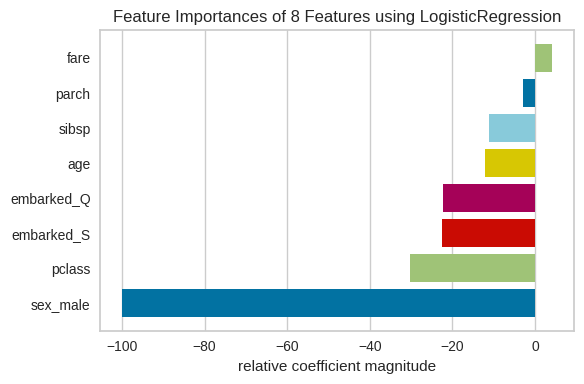

<Axes: title={'center': 'Feature Importances of 8 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [17]:
from yellowbrick.features import FeatureImportances

fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X, y)
fi_viz.poof()

## Naive Bayes

### Interpretação dos Resultados

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb = GaussianNB()

In [20]:
nb.fit(X_train, y_train)

GaussianNB()

In [21]:
nb.score(X_test, y_test)

0.7557251908396947

In [22]:
nb.predict(X.iloc[[0]])

array([0])

In [23]:
nb.predict_proba(X.iloc[[0]])

array([[0.95955324, 0.04044676]])

In [24]:
nb.predict_log_proba(X.iloc[[0]])

array([[-0.04128748, -3.20776872]])

## Máquina de Vetores de Suporte (SVM)

### Interpretação dos Resultados    

In [25]:
from sklearn.svm import SVC

svc = SVC(probability=True)

In [26]:
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

0.8015267175572519

In [27]:
svc.predict(X.iloc[[0]])

array([0])

In [28]:
svc.predict_proba(X.iloc[[0]])

array([[0.84338206, 0.15661794]])

In [29]:
svc.predict_log_proba(X.iloc[[0]])

array([[-0.17033521, -1.85394595]])